# Summary

let's draw some sheep

In [75]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import Dataset, DataLoader

import torchvision
from torchvision import transforms, utils

from draw_strokes import draw_strokes, make_grid_svg

In [76]:
train = np.load("Sheep_Market/train.npy", encoding='latin1')
test = np.load("Sheep_Market/test.npy", encoding='latin1')
valid = np.load("Sheep_Market/valid.npy", encoding='latin1')

print("train: '{}', test: '{}', valid: '{}'".format(train.shape, test.shape, valid.shape))

train: '(7400,)', test: '(300,)', valid: '(300,)'


# Helper code

General utilities used to do the assignment.

In [85]:
class SheepDataset(Dataset):
    """ 
    Reference: 
        https://www.kaggle.com/leighplt/pytorch-starter-kit 
    """
    
    def __init__(self, npyfpath, mode='train', transform=None, size=256):
        self.dataset = np.load(npyfpath, encoding='latin1')
        self.mode = mode
        self.transform = transform
        self.size = size
        
    @staticmethod
    def _get_bounds(data, factor):
        min_x = 0
        max_x = 0
        min_y = 0
        max_y = 0

        abs_x = 0
        abs_y = 0
        for i in range(len(data)):
            x = float(data[i,0])/factor
            y = float(data[i,1])/factor
            abs_x += x
            abs_y += y
            min_x = min(min_x, abs_x)
            min_y = min(min_y, abs_y)
            max_x = max(max_x, abs_x)
            max_y = max(max_y, abs_y)

        return (min_x, max_x, min_y, max_y)
 
    @staticmethod
    def _draw(raw_strokes, size=256, lw=6, factor=0.8):
        """ Draw the image then resize to a standard dim 
        
        Return a 256 x 256 x 1 matrix
        """
        
        BASE_SIZE = 256
        img = np.zeros((BASE_SIZE, BASE_SIZE), np.uint8)
        
        min_x, max_x, min_y, max_y = get_bounds(data, factor)
        dims = (50 + max_x - min_x, 50 + max_y - min_y)
        lift_pen = 1
        abs_x = 25 - min_x 
        abs_y = 25 - min_y
        command = "m"
        
        for i in range(raw_strokes.shape[0]):
            if (lift_pen == 1):
                command = "m"
            elif (command != "l"):
                command = "l"
            else:
                command = ""
                
            if command == "l":
                x = float(raw_strokes[i,0])/factor
                y = float(raw_strokes[i,1])/factor

            lift_pen = raw_strokes[i, 2]
                
            
            
        
        
        
        
        
        
        for i in range(raw_strokes.shape[0]):
            m = raw_strokes[i]
            for j in range(m[0] - 1):
                color = 255 - min(i, 10) * 13 if time_color else 255
                _ = cv2.line(img, (m[j], m[j]),
                             (m[0][j + 1], m[1][j + 1]), color, lw)
        if size != BASE_SIZE:
            return cv2.resize(img, (size, size))
        else:
            return img
        
    def __len__(self):
        return int(self.dataset.shape[0])
    
    def __getitem__(self, idx):
        raw_strokes = self.dataset[idx]
        sample = self._draw(raw_strokes, size=self.size, lw=2, time_color=True)
        if self.transform:
            sample = self.transform(sample)
        if self.mode == 'train':
            return sample
        else:
            return sample
    

# 2.1 Rendering

Let's meet the sheep.

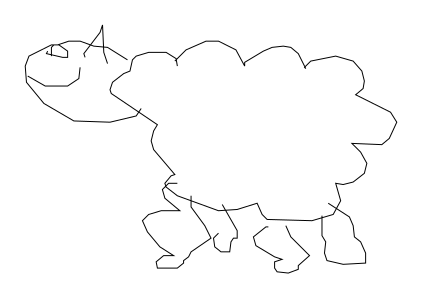

In [96]:
draw_strokes(train[0])

In [79]:
train_loader = DataLoader(SheepDataset("Sheep_Market/train.npy"))


In [80]:
# functions to show an image
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

In [81]:
# get some images
dataiter = iter(train_loader)
images = dataiter.next()

IndexError: invalid index to scalar variable.

In [74]:
# show images
plt.figure(figsize=(16,24))
imshow(torchvision.utils.make_grid(images))

NameError: name 'images' is not defined

<Figure size 1152x1728 with 0 Axes>

In [14]:
m = train[0]

In [95]:
m

array([[  2,  -4,   0],
       [  9,  -9,   0],
       [ 16,  -7,   0],
       [ 10,   0,   0],
       [ 14,   7,   0],
       [  7,  13,   0],
       [  0,  -3,   0],
       [ 15,  -9,   0],
       [  7,  -3,   0],
       [  9,  -1,   0],
       [  6,   1,   0],
       [  6,   5,   0],
       [  6,  12,   0],
       [ -1,  -1,   0],
       [  5,  -5,   0],
       [ 20,  -4,   0],
       [ 14,   4,   0],
       [  7,   8,   0],
       [  2,   8,   0],
       [ -1,   6,   0],
       [ -6,   5,   0],
       [ 28,  14,   0],
       [  5,   8,   0],
       [ -6,  13,   0],
       [ -6,   5,   0],
       [-24,  -1,   0],
       [  7,   7,   0],
       [  5,   9,   0],
       [ -2,   8,   0],
       [ -9,   7,   0],
       [ -8,   2,   0],
       [ -6,  -1,   0],
       [  4,  14,   0],
       [ -6,  11,   0],
       [-17,   5,   0],
       [-36,  -1,   0],
       [ -4,  -4,   0],
       [ -4,  -9,   0],
       [-16,   5,   0],
       [-15,   1,   0],
       [-33, -12,   0],
       [ -9,  -7